
# Análise do Monitoramento de Queimadas 

Autores: Matheus Henrique Nonsiboni, Daniel Fiori Souza, Livia Kouketsu da Silva, Rafael Lançoni Santos. 

Este notebook tem o objetivo de analisar dados a respeito do número de queimadas no Brasil e suas informações relevantes.


## Importações


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import StandardScaler
import matplotlib.pyplot as plt


RS = 57


## Carregar os dados que serão utilizados


In [ ]:
file = 'student-mat.csv' 
data = pd.read_csv(file, sep=';')
print("Dados carregados:")
print(data.head())

Dados carregados:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


## Pré-processamento
Filtrar classes com pelo menos 2 amostras


In [ ]:
counts = data['G3'].value_counts()
valid_classes = counts[counts >= 2].index
filtered_data = data[data['G3'].isin(valid_classes)]
# Transformar variáveis categóricas em variáveis numéricas 
filtered_data_encoded = pd.get_dummies(filtered_data, drop_first=True)



## MÉTODO DE PREDIÇÃO KNN (K NEAREST NEIGHBORS)


## 1 - Dividindo o conjunto de dados em treino e teste
Selecionar features (X) e target (y). Prever nota final G3 usando todas as outras colunas como features.


In [ ]:
X = filtered_data_encoded.drop(columns=['G3'])
y = filtered_data_encoded['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RS)
print("Conjunto de dados dividido em treino e teste.")
print("Tamanho treino:", X_train.shape, " | Tamanho teste:", X_test.shape)

Conjunto de dados dividido em treino e teste.
Tamanho treino: (314, 41)  | Tamanho teste: (79, 41)



## 2 - Treinar o modelo e fazer previsões 
Métodos fit e predict respectivamente usando a distancia euclidiana para vários valores de K


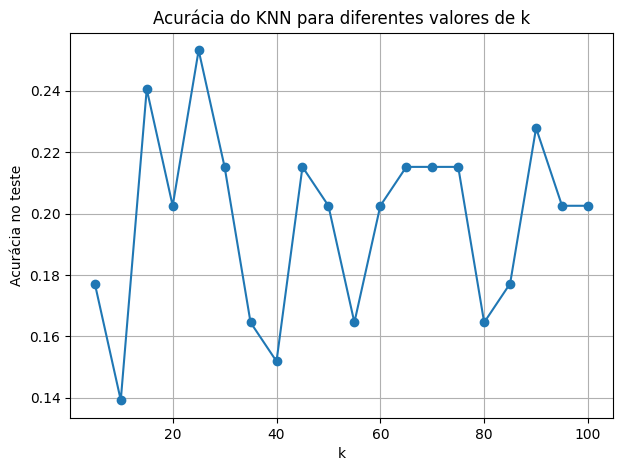

In [ ]:

ks = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
accs = []
for k in ks:
    knn = Pipeline([
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier(n_neighbors=k))
    ])  
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accs.append(acc)

plt.figure(figsize=(7, 5))
plt.plot(ks, accs, marker='o')
plt.xlabel('k')
plt.ylabel('Acurácia no teste')
plt.title('Acurácia do KNN para diferentes valores de k')
plt.grid(True)
plt.show()





## 3 - Usando agora peso nas distâncias (ponderadas)
Os K mais próximos terão mais efeito sobre a decisão do algoritmo.

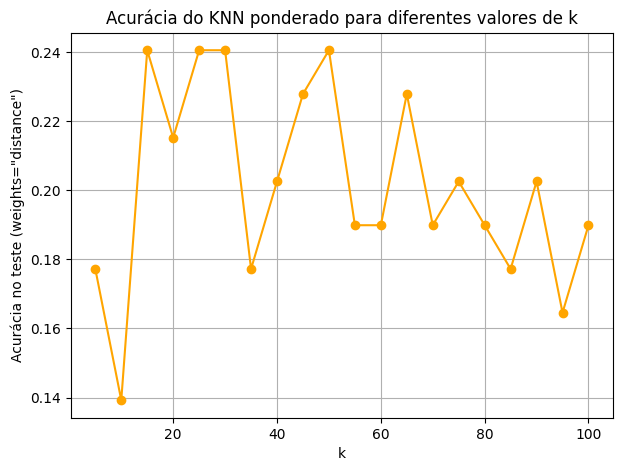

In [ ]:
ks = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
accs_distance = []
for k in ks:
    knn_distance = Pipeline([
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier(n_neighbors=k, weights='distance'))
    ])
    knn_distance.fit(X_train, y_train)
    y_pred_d = knn_distance.predict(X_test)
    acc_d = accuracy_score(y_test, y_pred_d)
    accs_distance.append(acc_d)

plt.figure(figsize=(7, 5))
plt.plot(ks, accs_distance, marker='o', color='orange')
plt.xlabel('k')
plt.ylabel('Acurácia no teste (weights="distance")')
plt.title('Acurácia do KNN ponderado para diferentes valores de k')
plt.grid(True)
plt.show()


## MÉTODO NAIVE BAYES 